# Projext P2 milestone
The goal is to reproduce a figure from a paper. We got two datafiles for this. 

In [ ]:
 '''
 File name: replication_report.ipynb
 Author: IB
 Date created: 30/10/2020
 Date last modified: 01/11/2020
 Python Version: 3.8
 '''

In [2]:
# Import libraries
import warnings
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd

In [3]:
# Define the data path and datafiles
data_path = './'
food_purchases = pd.read_csv(data_path+'year_osward_grocery.csv', index_col='area_id')
diabetes_estimates = pd.read_csv(data_path+'diabetes_estimates_osward_2016.csv', index_col='area_id')

We want to check out the dataframe and see what is written in the columns etc.:

In [4]:
# Check out the dimension and structure of the data
food_purchases.head()

,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,volume_perc2.5,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
area_id,,,,,,,,,,,,,,,,,,,,,
E05000026,449.535137,32.5,166.4,300.0,500.0,1500.0,771.349423,3.716832,125.960833,11.00,...,37315,14370.0,7469.0,6901.0,4211.0,9421.0,738.0,29.572999,1.26,11404.761905
E05000027,413.130263,32.5,150.0,300.0,500.0,1500.0,626.395178,5.164174,110.664114,15.00,...,14474,10845.0,5228.0,5617.0,3205.0,6608.0,1032.0,33.568004,1.36,7974.264706
E05000028,407.100472,32.5,160.0,300.0,500.0,1200.0,545.890959,2.710677,121.990710,11.00,...,32138,13856.0,6750.0,7106.0,4180.0,8537.0,1139.0,32.032693,1.29,10741.085271
E05000029,384.173858,30.0,150.0,250.0,454.0,1500.0,591.837557,4.968373,122.245578,11.00,...,16223,10850.0,5300.0,5550.0,3023.0,6251.0,1576.0,36.004793,3.38,3210.059172
E05000030,356.882607,30.0,140.0,250.0,450.0,1000.0,465.284180,3.880963,109.959688,13.69,...,17522,11348.0,5515.0,5833.0,2747.0,6961.0,1640.0,37.247444,3.45,3289.275362


The dataframe of the food purchases contains 201 columns, so 201 parameters that have been provided. This is a lot and I need to get an overwiew to see which of the parameters are important to me for the replication. I list the colums to find what is interesting for me: 

In [5]:
# Check out all column names of food_purchases
list(food_purchases)

['weight',
 'weight_perc2.5',
 'weight_perc25',
 'weight_perc50',
 'weight_perc75',
 'weight_perc97.5',
 'weight_std',
 'weight_ci95',
 'volume',
 'volume_perc2.5',
 'volume_perc25',
 'volume_perc50',
 'volume_perc75',
 'volume_perc97.5',
 'volume_std',
 'volume_ci95',
 'fat',
 'fat_perc2.5',
 'fat_perc25',
 'fat_perc50',
 'fat_perc75',
 'fat_perc97.5',
 'fat_std',
 'fat_ci95',
 'saturate',
 'saturate_perc2.5',
 'saturate_perc25',
 'saturate_perc50',
 'saturate_perc75',
 'saturate_perc97.5',
 'saturate_std',
 'saturate_ci95',
 'salt',
 'salt_perc2.5',
 'salt_perc25',
 'salt_perc50',
 'salt_perc75',
 'salt_perc97.5',
 'salt_std',
 'salt_ci95',
 'sugar',
 'sugar_perc2.5',
 'sugar_perc25',
 'sugar_perc50',
 'sugar_perc75',
 'sugar_perc97.5',
 'sugar_std',
 'sugar_ci95',
 'protein',
 'protein_perc2.5',
 'protein_perc25',
 'protein_perc50',
 'protein_perc75',
 'protein_perc97.5',
 'protein_std',
 'protein_ci95',
 'carb',
 'carb_perc2.5',
 'carb_perc25',
 'carb_perc50',
 'carb_perc75',
 'car

We want the energy contained in each category: Total energy and the energy of: Fat, saturated fats, sugar, protein, carbohydrates and fibres.
Then we check out the second dataframe:

In [6]:
# Check out dataframe structure
diabetes_estimates.head()

,gp_patients,gp_patients_diabetes,estimated_diabetes_prevalence
area_id,,,
E05000026,13136,1068,8.1
E05000027,8954,631,7.0
E05000028,12032,958,8.0
E05000029,8853,700,7.9
E05000030,8813,640,7.3


From the second dataframe we want the estimated diabetes prevalence. 

In [20]:
# Put relevant nutrient data into a new dataframe
relevant_food_data = pd.DataFrame()
relevant_food_data = food_purchases.loc[:,['energy_tot', 'energy_fat','energy_saturate', 'energy_sugar', 'energy_protein', 'energy_carb', 'energy_fibre', 'h_nutrients_calories']]
#relevant_food_data = food_purchases[['energy_tot', 'energy_fat','energy_saturate', 'energy_sugar', 'energy_protein', 'energy_carb', 'energy_fibre', 'h_nutrients_calories']]
relevant_food_data['estimated_diabetes_prevalence']=diabetes_estimates['estimated_diabetes_prevalence']
relevant_food_data.rename(columns={'energy_tot':'energy', 'energy_fat':'fat','energy_saturate':'saturate','energy_sugar':'sugar','energy_protein':'protein','energy_carb':'carb','energy_fibre':'fibre','h_nutrients_calories':'entropy'}, inplace = True)
relevant_food_data.head()

,energy,fat,saturate,sugar,protein,carb,fibre,entropy,estimated_diabetes_prevalence
area_id,,,,,,,,,
E05000026,187.114757,85.399176,33.243489,43.864852,19.910240,77.527804,2.890336,1.532485,8.1
E05000027,188.638145,87.602703,32.093215,42.057709,20.846778,75.801393,2.917849,1.541202,7.0
E05000028,186.861792,82.946787,32.522242,42.761088,20.769647,78.648192,2.919193,1.549774,8.0
E05000029,190.783934,87.301229,35.651376,51.754425,18.872734,80.338935,2.868373,1.514848,7.9
E05000030,188.136201,84.436271,32.531970,45.331593,21.228013,78.325611,2.963643,1.540547,7.3


Now we want to calculate the correlation between the estimated diabetes prevalence and all energy types.  
We want to separate the positive from the negative correlations with different colors. Therefore we will add a mask to mark al the positive correlations. The mask we can just add as another column in the dataframe. 

In [21]:
# Get the correlation coefficients of all food data to the diabetes prevalence
corr_coeff=pd.DataFrame(relevant_food_data.corr(method='spearman')['estimated_diabetes_prevalence'])
# We add a column to create a mask to differenciate between positive and negative correlations 
corr_coeff['positive']=corr_coeff['estimated_diabetes_prevalence']>0
corr_coeff=corr_coeff.drop('estimated_diabetes_prevalence', axis=0)

In [22]:
#Check out the dataframe:
corr_coeff

,estimated_diabetes_prevalence,positive
energy,0.584141,True
fat,0.364667,True
saturate,0.355926,True
sugar,0.534064,True
protein,-0.467627,False
carb,0.684758,True
fibre,-0.495136,False
entropy,-0.774751,False


This is the list of the correlation values for the different parameters. This is what we want to visualize in a bar plot. 

Text(0, 0.5, 'R')

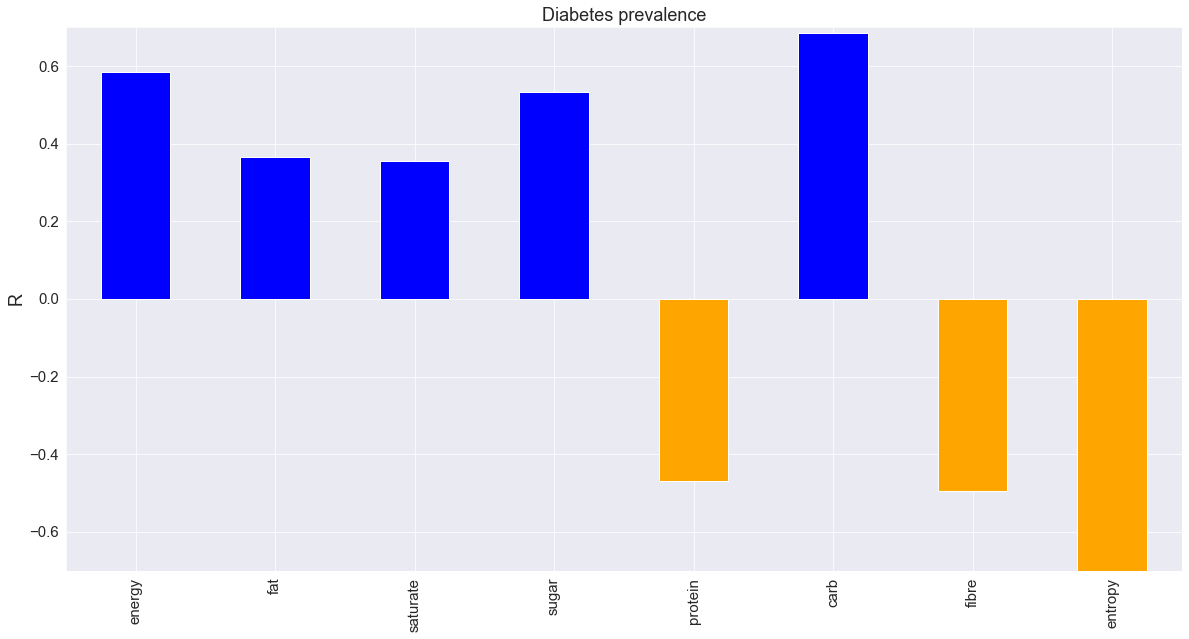

In [23]:
# Bar plots of correlations
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize = (20,10))
ax=corr_coeff['estimated_diabetes_prevalence'].plot(kind='bar',color=corr_coeff.positive.map({True: 'blue', False: 'orange'}), 
                                        ylim=(-0.7,0.7),fontsize = 15)
ax.set_title('Diabetes prevalence', fontsize=18)
ax.set_ylabel('R', fontsize = 18)